In [26]:
import pandas as pd
a = pd.read_csv("/content/breast_cancer_survival.csv")
print(data)

   Prefecture  Life_expectancy  Physician  Junior_col  University  \
0       Aichi            84.65      224.4        13.6        23.7   
1       Akita            83.79      242.6        11.3        11.9   
2      Aomori            82.80      212.5        11.4        11.8   
3       Chiba            84.48      205.8        14.7        24.9   
4       Ehime            84.24      276.7        14.2        18.0   
5       Fukui            84.91      257.9        12.9        18.8   
6     Fukuoka            84.54      309.9        14.2        20.4   
7   Fukushima            83.71      205.7        11.6        13.1   
8        Gifu            84.71      224.5        13.4        18.5   
9       Gunma            84.16      233.8        14.7        17.5   
10  Hiroshima            85.06      267.1        16.1        23.1   
11   Hokkaido            84.00      251.3        14.1        14.4   
12      Hyogo            84.81      266.1        13.7        24.5   
13    Ibaraki            83.92    

In [27]:
features = a.drop(columns=["Patient_Status"])
print(features)

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Positive  Posit

In [28]:
target = a["Patient_Status"]
print(target)

0      Alive
1       Dead
2      Alive
3      Alive
4      Alive
       ...  
329    Alive
330    Alive
331     Dead
332    Alive
333     Dead
Name: Patient_Status, Length: 334, dtype: object


In [29]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, test_size=0.2, random_state=100)
print(df_train)
print(df_test)
print(df_train.shape, df_test.shape)

   Prefecture  Life_expectancy  Physician  Junior_col  University  \
0       Aichi            84.65      224.4        13.6        23.7   
42     Toyama            84.86      261.5        15.7        19.8   
32      Osaka            84.09      285.7        13.2        21.8   
35      Shiga            85.50      236.3        14.9        22.4   
21      Kyoto            85.25      332.6        13.3        24.0   
7   Fukushima            83.71      205.7        11.6        13.1   
44   Yamagata            84.39      229.2        12.2        13.7   
18   Kanagawa            84.97      223.0        15.1        29.2   
25     Nagano            85.46      243.8        16.9        18.1   
19      Kochi            84.32      322.0        12.9        14.3   
13    Ibaraki            83.92      193.8        12.7        18.2   
1       Akita            83.79      242.6        11.3        11.9   
31    Okinawa            84.31      257.2        13.9        15.8   
12      Hyogo            84.81    

In [31]:
a.Patient_Status[a.Patient_Status == 'Alive'] = 1
a.Patient_Status[a.Patient_Status == 'Dead'] = 0
print(a)

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Positive  Posit

<ipython-input-31-950a6cd56443>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.Patient_Status[a.Patient_Status == 'Alive'] = 1
<ipython-input-31-950a6cd56443>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.Patient_Status[a.Patient_Status == 'Dead'] = 0


In [32]:
from sklearn.model_selection import train_test_split
column_name_mapping = {'ER status': 'ERstatus', 'PR status': 'PRstatus', 'HER2 status': 'HER2status'}
a.rename(columns=column_name_mapping, inplace=True)
a.HER2status[a.HER2status== 'Positive'] = 1
a.HER2status[a.HER2status== 'Negative'] = 0
a.Tumour_Stage[a.Tumour_Stage == 'II'] = 2
a.Tumour_Stage[a.Tumour_Stage == 'I'] = 1
a.Tumour_Stage[a.Tumour_Stage == 'III'] = 3
a.Surgery_type[a.Surgery_type == 'Other'] = 1
a.Surgery_type[a.Surgery_type == 'Lumpectomy'] = 2
a.Surgery_type[a.Surgery_type == 'Modified Radical Mastectomy'] = 3
a.Surgery_type[a.Surgery_type == 'Simple Mastectomy'] = 4
data = a.dropna()
y = data['Patient_Status']
X = data.drop(columns = ['Date_of_Surgery','Date_of_Last_Visit','Histology','Gender','ERstatus','PRstatus'])
print(data)

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340            2   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320            2   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815            2   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            1   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210            2   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320            2   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            1   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860            2   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820            2   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050            2   

                          Histology  ERstatus  PRstatus HER2status  \
0     Infiltrating Ductal Carcinoma  Positive  Positi

<ipython-input-32-7885cc43bc93>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.HER2status[a.HER2status== 'Positive'] = 1
<ipython-input-32-7885cc43bc93>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.HER2status[a.HER2status== 'Negative'] = 0
<ipython-input-32-7885cc43bc93>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.Tumour_Stage[a.Tumour_Stage == 'II'] = 2
<ipython-input-32-7885cc43bc93>:7: SettingWithCopyWarning: 
A val

In [33]:
print(X)

     Age  Protein1  Protein2  Protein3  Protein4 Tumour_Stage HER2status  \
0     42  0.952560   2.15000  0.007972 -0.048340            2          0   
1     54  0.000000   1.38020 -0.498030 -0.507320            2          0   
2     63 -0.523030   1.76400 -0.370190  0.010815            2          0   
3     78 -0.876180   0.12943 -0.370380  0.132190            1          0   
4     42  0.226110   1.74910 -0.543970 -0.390210            2          1   
..   ...       ...       ...       ...       ...          ...        ...   
329   59  0.024598   1.40050  0.024751  0.280320            2          1   
330   41  0.100120  -0.46547  0.472370 -0.523870            1          1   
331   54  0.753820   1.64250 -0.332850  0.857860            2          0   
332   74  0.972510   1.42680 -0.366570 -0.107820            2          0   
333   66  0.286380   1.39980  0.318830  0.836050            2          0   

    Surgery_type Patient_Status  
0              1              1  
1              1   

[1.         0.99209486 0.99604743 0.99209486 0.99604743 0.99604743
 0.99604743 0.99604743 0.99604743 0.99209486 0.99604743 0.99604743
 0.99604743 0.99209486 0.99604743 0.98418972 0.98814229 0.98814229
 0.98814229]
[1.       1.       1.       1.       1.       1.       1.       1.
 1.       1.       1.       1.       1.       1.       1.       0.984375
 0.984375 0.984375 0.984375]


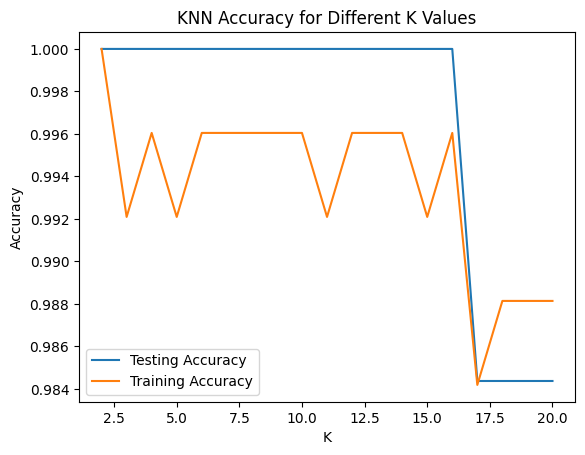

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_accuracy = np.empty(19)
test_accuracy = np.empty(19)


for i, k in enumerate(range(2, 21)):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_accuracy[i] = knn.score(X_train_scaled, y_train)
    test_accuracy[i] = knn.score(X_test_scaled, y_test)

print(train_accuracy)
print(test_accuracy)
plt.title('KNN Accuracy for Different K Values')
plt.plot(range(2, 21), test_accuracy, label='Testing Accuracy')
plt.plot(range(2, 21), train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [35]:
import pandas as pd
a = pd.read_csv("/content/Japan_life_expectancy.csv")
print(a)

   Prefecture  Life_expectancy  Physician  Junior_col  University  \
0       Aichi            84.65      224.4        13.6        23.7   
1       Akita            83.79      242.6        11.3        11.9   
2      Aomori            82.80      212.5        11.4        11.8   
3       Chiba            84.48      205.8        14.7        24.9   
4       Ehime            84.24      276.7        14.2        18.0   
5       Fukui            84.91      257.9        12.9        18.8   
6     Fukuoka            84.54      309.9        14.2        20.4   
7   Fukushima            83.71      205.7        11.6        13.1   
8        Gifu            84.71      224.5        13.4        18.5   
9       Gunma            84.16      233.8        14.7        17.5   
10  Hiroshima            85.06      267.1        16.1        23.1   
11   Hokkaido            84.00      251.3        14.1        14.4   
12      Hyogo            84.81      266.1        13.7        24.5   
13    Ibaraki            83.92    

In [36]:
y = a['Life_expectancy']
a = a.drop(columns = 'Prefecture',axis = 1)
a.head()

,Life_expectancy,Physician,Junior_col,University,Public_Hosp,Pshic_hosp,Beds_psic,Nurses,Avg_hours,Salary,...,Park,Forest,Income_per capita,Density_pop,Hospitals,Beds,Ambulances,Health_exp,Educ_exp,Welfare_exp
0,84.65,224.4,13.6,23.7,13.7,0.5,164.3,845.4,171.5,319.45,...,17.2,42.1,3728.0,2517.7,3.8,758.7,3.7,2.06,21.41,16.53
1,83.79,242.6,11.3,11.9,34.0,1.7,404.6,1105.5,173.0,257.30,...,10.6,70.3,2697.0,296.8,5.2,1168.5,9.0,3.24,17.93,13.50
2,82.80,212.5,11.4,11.8,42.9,1.4,348.7,1108.8,174.5,254.50,...,11.8,63.6,2507.0,380.5,6.2,1112.8,9.1,3.40,20.98,15.92
3,84.48,205.8,14.7,24.9,16.1,0.5,195.8,749.1,173.5,314.95,...,5.5,30.1,3116.0,1778.4,4.1,806.2,4.2,3.53,25.44,18.24
4,84.24,276.7,14.2,18.0,17.4,1.0,329.7,1277.5,178.0,272.50,...,7.2,70.5,2658.0,801.2,9.1,1274.2,7.1,4.82,20.47,15.60


In [38]:
train, valid, test = np.split(a.sample(frac=1), [int(0.6*len(a)), int(0.8*len(a))])
def scale_dataset(dataframe):
  X = dataframe[dataframe.columns[1:]].values
  y = dataframe[dataframe.columns[0]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train)
valid, X_valid, y_valid = scale_dataset(valid)
test, X_test, y_test = scale_dataset(test)

mean squared error list: [0.21875, 0.16796875, 0.17361111111111113, 0.16796875, 0.16437500000000002, 0.16883680555555555, 0.1556122448979592, 0.157470703125, 0.14911265432098766, 0.150625, 0.1481146694214876, 0.14865451388888887, 0.15430843195266272, 0.1563297193877551, 0.14729166666666668, 0.1478271484375, 0.1445717993079585, 0.14631558641975312, 0.14581890581717452, 0.1456640625]
least mean squared error occured = 0.1445717993079585
least mse is occured at k value =  16


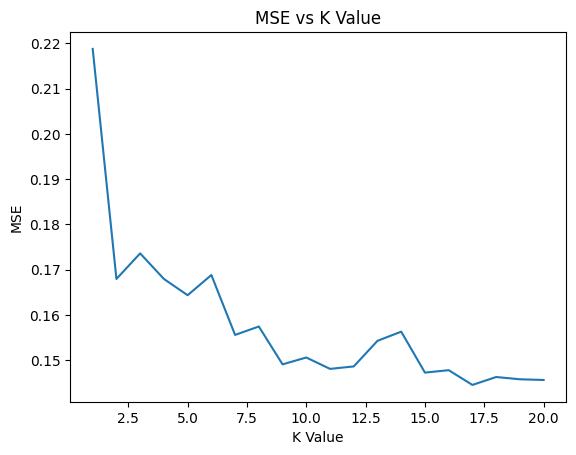

In [39]:


from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

mse_values = []


for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
print("mean squared error list:",mse_values)
print("least mean squared error occured =",min(mse_values))
minimum = min(mse_values)
print("least mse is occured at k value = ",mse_values.index(minimum))
# Plot the results
plt.plot(range(1, 21), mse_values)
plt.title('MSE vs K Value')
plt.xlabel('K Value')
plt.ylabel('MSE')
plt.show()